In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [6]:
df['Cabin'].isnull().sum()

327

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df=df.replace({'male':0, 'female':1})

C:\Users\Marcin\AppData\Local\Temp\ipykernel_18384\1780871696.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({'male':0, 'female':1})


In [9]:
df['Age'].isnull().sum()

86

In [10]:
df.Age

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [11]:
df.Age = df.Age.fillna(df.Age.mean())
df.Fare = df.Fare.fillna(df.Fare.mean())

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
df['Age'].isnull().sum()
df['Fare'].isnull().sum()

0

In [14]:
df['Embarked']

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [16]:
df=df.drop('Name',axis=1)
df=df.drop('Cabin',axis=1)
df=df.drop('PassengerId',axis=1)

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,34.5,0,0,330911,7.8292,Q
1,1,3,1,47.0,1,0,363272,7.0000,S
2,0,2,0,62.0,0,0,240276,9.6875,Q
3,0,3,0,27.0,0,0,315154,8.6625,S
4,1,3,1,22.0,1,1,3101298,12.2875,S


In [19]:
df.shape

(418, 9)

In [20]:
df=df.replace({'Q':0, 'S':1,'C':2})

C:\Users\Marcin\AppData\Local\Temp\ipykernel_18384\1297946713.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({'Q':0, 'S':1,'C':2})


In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,34.5,0,0,330911,7.8292,0
1,1,3,1,47.0,1,0,363272,7.0000,1
2,0,2,0,62.0,0,0,240276,9.6875,0
3,0,3,0,27.0,0,0,315154,8.6625,1
4,1,3,1,22.0,1,1,3101298,12.2875,1


In [22]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,34.50000,0,0,330911,7.8292,0
1,1,3,1,47.00000,1,0,363272,7.0000,1
2,0,2,0,62.00000,0,0,240276,9.6875,0
3,0,3,0,27.00000,0,0,315154,8.6625,1
4,1,3,1,22.00000,1,1,3101298,12.2875,1
...,...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,A.5. 3236,8.0500,1
414,1,1,1,39.00000,0,0,PC 17758,108.9000,2
415,0,3,0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,1
416,0,3,0,30.27259,0,0,359309,8.0500,1


(array([266.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

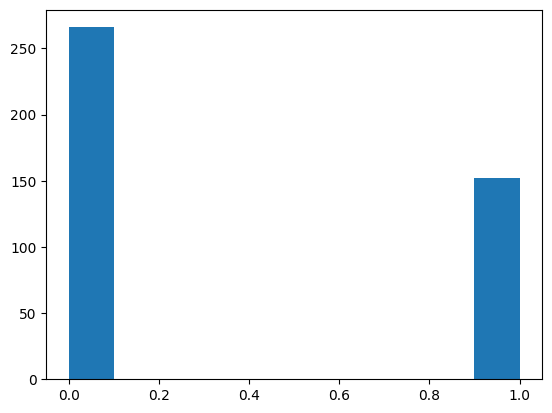

In [23]:
plt.hist(df['Survived'])

In [24]:
print("Ticket unique: ",len(df['Ticket'].unique()))
print("SibSp unique: ",len(df['SibSp'].unique()))
print("Pclass unique: ",len(df['Pclass'].unique()))
print("Parch unique: ",len(df['Parch'].unique()))

Ticket unique:  363
SibSp unique:  7
Pclass unique:  3
Parch unique:  8


(array([283., 110.,  14.,   4.,   0.,   4.,   1.,   0.,   0.,   2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

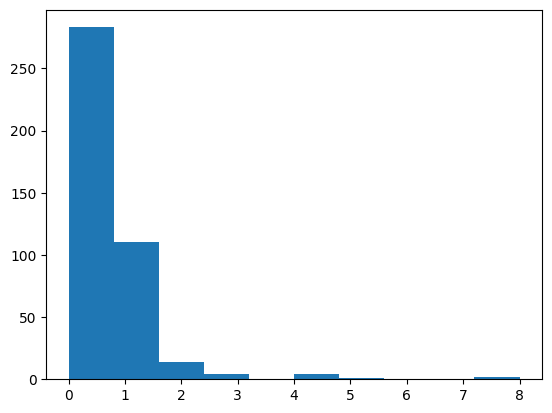

In [25]:
plt.hist(df['SibSp'])

(array([107.,   0.,   0.,   0.,   0.,  93.,   0.,   0.,   0., 218.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

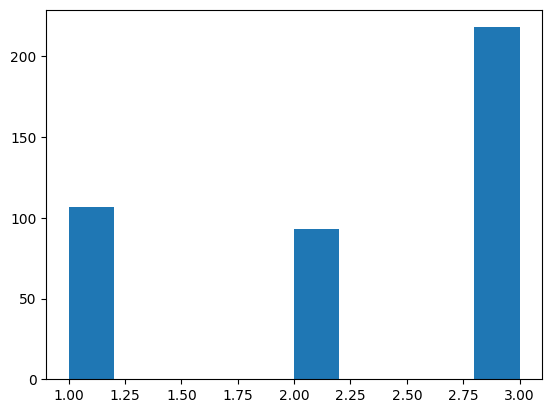

In [26]:
plt.hist(df['Pclass'])

(array([324.,  52.,  33.,   3.,   2.,   1.,   1.,   0.,   0.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

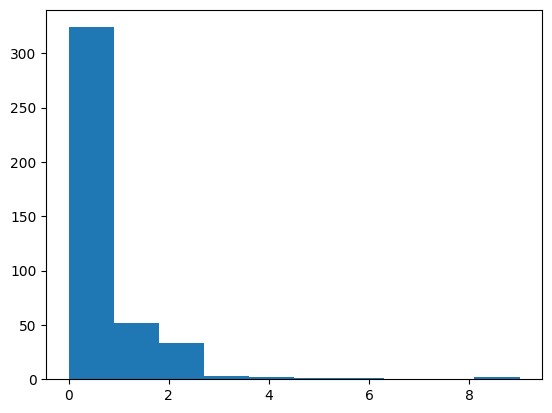

In [27]:
plt.hist(df['Parch'])

(array([266.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

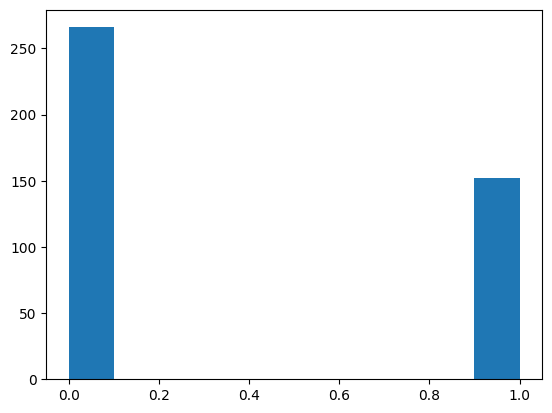

In [28]:
plt.hist(df['Sex'])

In [29]:
df.Ticket.value_counts().sort_values(ascending=False).head(10)

Ticket
PC 17608              5
113503                4
CA. 2343              4
PC 17483              3
220845                3
347077                3
SOTON/O.Q. 3101315    3
C.A. 31029            3
16966                 3
2662                  2
Name: count, dtype: int64

In [30]:
#In thsi model i will drop Ticket column
df=df.drop('Ticket',axis=1)

In [31]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,0
1,1,3,1,47.00000,1,0,7.0000,1
2,0,2,0,62.00000,0,0,9.6875,0
3,0,3,0,27.00000,0,0,8.6625,1
4,1,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,8.0500,1
414,1,1,1,39.00000,0,0,108.9000,2
415,0,3,0,38.50000,0,0,7.2500,1
416,0,3,0,30.27259,0,0,8.0500,1


In [32]:
Y=df['Survived']
X=df.drop('Survived',axis=1)

In [33]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [34]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,0
1,3,1,47.00000,1,0,7.0000,1
2,2,0,62.00000,0,0,9.6875,0
3,3,0,27.00000,0,0,8.6625,1
4,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,1
414,1,1,39.00000,0,0,108.9000,2
415,3,0,38.50000,0,0,7.2500,1
416,3,0,30.27259,0,0,8.0500,1


In [35]:
categorical_cols = ['Pclass','SibSp','Parch','Embarked']
X=pd.get_dummies(X,columns=categorical_cols)
X = X.replace({True: 1, False: 0})
X

C:\Users\Marcin\AppData\Local\Temp\ipykernel_18384\1942624784.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({True: 1, False: 0})


,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_0,Embarked_1,Embarked_2
0,0,34.50000,7.8292,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,47.00000,7.0000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,62.00000,9.6875,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,27.00000,8.6625,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,22.00000,12.2875,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,30.27259,8.0500,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
414,1,39.00000,108.9000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
415,0,38.50000,7.2500,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
416,0,30.27259,8.0500,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
scaler=StandardScaler()
X_scaled=X
X_scaled[['Age','Fare']]=scaler.fit_transform(X_scaled[['Age','Fare']])
X_scaled

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_0,Embarked_1,Embarked_2
0,0,0.334993,-0.498407,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1.325530,-0.513274,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.514175,-0.465088,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,-0.259330,-0.483466,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,-0.655545,-0.418471,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0.000000,-0.494448,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
414,1,0.691586,1.313753,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
415,0,0.651965,-0.508792,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
416,0,0.000000,-0.494448,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
Y.shape

(418,)

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_predict=model.predict(X_train)
print(y_train.shape)
print(y_predict.shape)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_predict)


(334,)
(334,)


array([[216,   0],
       [  0, 118]], dtype=int64)

In [41]:
#Model seems to do perfectly on training set
y_predict_test=model.predict(X_test)
print(confusion_matrix(y_test,y_predict_test))
print(f"Target value for prediction on test set: {y_predict_test[:20]}")
print(f"Target value for test set: {y_test[:20]}")

[[50  0]
 [ 0 34]]
Target value for prediction on test set: [0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0]
Target value for test set: 321    0
324    1
388    0
56     0
153    1
30     0
72     1
82     0
258    1
416    0
9      0
391    1
104    1
414    1
413    0
39     0
412    1
378    0
55     0
406    0
Name: Survived, dtype: int64
